### ***Import the libraries***

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import nltk
import gensim
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from collections import Counter
from nltk import FreqDist
import itertools
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
pip install ipynb

In [4]:
%run '/content/drive/MyDrive/feature_extractors.py'

### ***Load the dataset***

In [5]:
data_path = '/content/drive/MyDrive/labeled_data.csv'
dataset = pd.read_csv(data_path)

In [6]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


### ***Clean the dataset***



Here, we import two python scripts to do this cleaning part and the feature extractions. They are,


1.   normalization.py - Use for data cleaning part
2.   feature_extractors.py - Use for feature extractions

Data cleaning steps:


*   Lowercasing


*   Remove URL's and emails


*   Tokenization

*   Removal of Punctuation

*   Stop Word Removal

*   Lemmatization
*   Removal of Special Characters or Numbers


*   Remove one letter token


*   Check the number of duplicate records

*   Check for the missing values











In [7]:
porter = PorterStemmer()

documents = dataset['tweet']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:

        # Remove phrases starts with 'https'
        review = re.sub(r'http://\S+|https://\S+', '', review)

        review = re.sub(r'@\w+', '', review)

        # Remove emails
        review = re.sub(r'[\w\.-]+@[\w\.-]+', '', review)

        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)

        # make all text lowercase
        review = review.lower()

        # apply tokenization
        Tokens = review.split()

        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)

    except:
        continue
    Cleaned_doc.append(review)

In [8]:
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

In [9]:
dataset['Cleaned_text'] = Cleaned_doc
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house always take trash
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confused shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf right trash mine bible scriptures hymns
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna nigguh like aint fuckin
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu wild bitches tellin lies


In [10]:
dataset['tokenized_text'] = dataset['Cleaned_text'].apply(word_tokenize)

In [11]:
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda tokens: [re.sub(r'[^A-Za-z]', '', token) for token in tokens])

In [12]:
## Remove empty strings from the tweet column
dataset['tokenized_text'] = [[word for word in article if word != ''] for article in dataset['tokenized_text']]

In [13]:
# Remove One letter token
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda tokens: [token for token in tokens if len(token) > 1])

In [14]:
## Check whether there any missing rows or not
dataset.isna().sum() ## No missing values in the dataset

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
Cleaned_text          0
tokenized_text        0
dtype: int64

In [15]:
## Check for the duplicates
dataset['Cleaned_text'].duplicated().sum()

1695

In [16]:
## Drop all the duplicates
dataset.drop_duplicates(subset = ['Cleaned_text'], inplace=True)

In [17]:
dataset = dataset.reset_index()
dataset = dataset.drop(columns = ['index' , 'Unnamed: 0'])
dataset

,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_text,tokenized_text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house always take trash,"[woman, complain, cleaning, house, always, tak..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place,"[dats, cold, tyga, cuffin, place]"
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confused shit,"[dawg, ever, fuck, bitch, start, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,"[look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told,"[shit, hear, might, true, might, faker, bitch,..."
...,...,...,...,...,...,...,...,...
23083,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf right trash mine bible scriptures hymns,"[muthaf, right, trash, mine, bible, scriptures..."
23084,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne..."
23085,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna nigguh like aint fuckin,"[young, buck, wan, na, nigguh, like, aint, fuc..."
23086,6,0,6,0,1,youu got wild bitches tellin you lies,youu wild bitches tellin lies,"[youu, wild, bitches, tellin, lies]"


### *Word Frequency Analysis*

In [18]:
# Flatten the list of tweet into a single list
articles = [word for sublist in dataset['tokenized_text'] for word in sublist]

# Count the frequency of each word
word_frequency = Counter(articles)

# Get the top 10 most common words
top_words = word_frequency.most_common(10)

# Print the top 10 words and their frequencies
for word, frequency in top_words:
    print(f"{word}: {frequency}")

bitch: 7708
bitches: 2959
like: 2723
hoes: 2210
pussy: 1980
fuck: 1342
shit: 1258
nigga: 1191
trash: 1095
know: 795


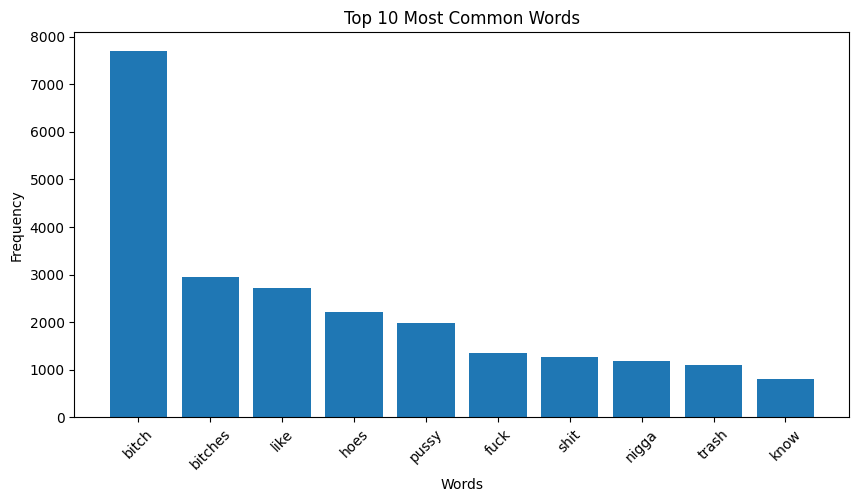

In [19]:
# Flatten the list of articles
flattened_list = list(itertools.chain.from_iterable(dataset['tokenized_text']))

# Calculate word frequency
freq_dist = FreqDist(flattened_list)

# Select top n words
top_words = freq_dist.most_common(10)

# Extract words and frequencies
words, frequencies = zip(*top_words)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()


### *Document length Analysis*

In [20]:
# Compute the length of each document
document_lengths = dataset['tokenized_text'].apply(len)

# Get descriptive statistics of document lengths
print(document_lengths.describe())


count    23088.000000
mean         6.193780
std          3.063576
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         21.000000
Name: tokenized_text, dtype: float64


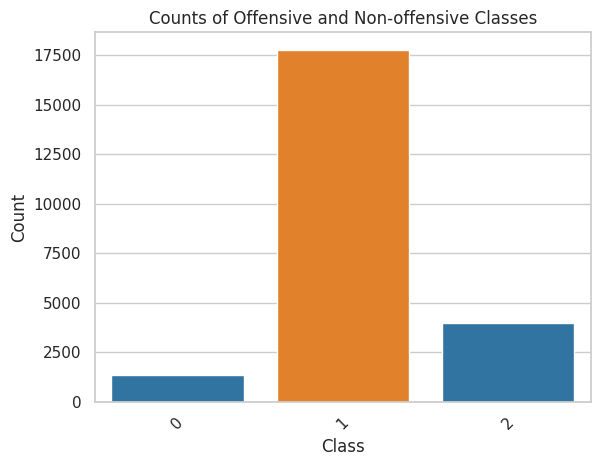

<Figure size 800x600 with 0 Axes>

In [21]:
import seaborn as sns

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the countplot with the custom color palette
sns.countplot(x='class', data=dataset, palette=custom_palette)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Counts of Offensive and Non-offensive Classes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))

# Show the plot
plt.show()


### **Change the class label**

In [22]:
dataset["updated_class"] = dataset["class"].replace({0: 1})
dataset

,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_text,tokenized_text,updated_class
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house always take trash,"[woman, complain, cleaning, house, always, tak...",2
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place,"[dats, cold, tyga, cuffin, place]",1
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confused shit,"[dawg, ever, fuck, bitch, start, confused, shit]",1
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,"[look, like, tranny]",1
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told,"[shit, hear, might, true, might, faker, bitch,...",1
...,...,...,...,...,...,...,...,...,...
23083,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf right trash mine bible scriptures hymns,"[muthaf, right, trash, mine, bible, scriptures...",1
23084,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne...",2
23085,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna nigguh like aint fuckin,"[young, buck, wan, na, nigguh, like, aint, fuc...",1
23086,6,0,6,0,1,youu got wild bitches tellin you lies,youu wild bitches tellin lies,"[youu, wild, bitches, tellin, lies]",1


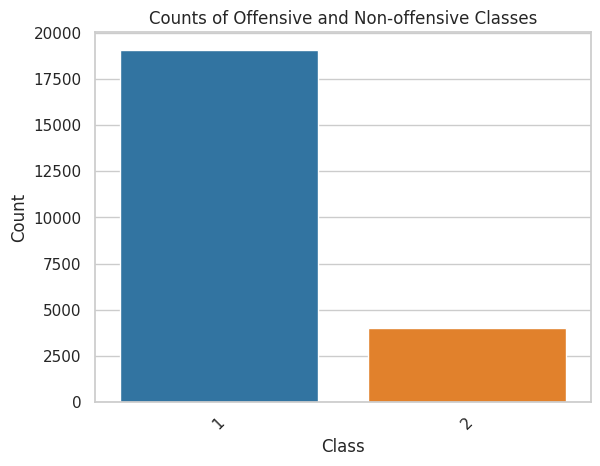

<Figure size 800x600 with 0 Axes>

In [23]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the countplot with the custom color palette
sns.countplot(x='updated_class', data=dataset, palette=custom_palette)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Counts of Offensive and Non-offensive Classes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

**Get the unique tokens**

In [24]:
# Tokenize the dataset into words
all_tokens = [token for article in dataset['tokenized_text'] for token in article]

# Remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# Filter tokens and count them
filtered_tokens = [token for token in all_tokens if token.lower() not in stop_words]
token_counter = Counter(filtered_tokens)

# Calculate dimensions
total_tokens = len(filtered_tokens)
unique_tokens = len(token_counter)

# Print the dimensions
print("Dimensions of the Article Collection:")
print(f"Total Tokens: {total_tokens}")
print(f"Unique Tokens: {unique_tokens}")
print('---')


Dimensions of the Article Collection:
Total Tokens: 142949
Unique Tokens: 18230
---


### ***Training, Test Sets***

In [25]:
# Divide the data into training and testing sets
def prepare_datasets_train_test(corpus, labels, test_data_proportion=0.2):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=0.20, random_state=42)
    return train_X, test_X, train_Y, test_Y

In [26]:
# We also remove empty documents since they would just add noise
def remove_empty_docs(corpus, labels):
    filtered_corpus = []
    filtered_labels = []
    for doc, label in zip(corpus, labels):
        if doc.strip():
            filtered_corpus.append(doc)
            filtered_labels.append(label)

    return filtered_corpus, filtered_labels

In [27]:
corpus, labels = dataset['Cleaned_text'], dataset['updated_class']
corpus, labels = remove_empty_docs(corpus, labels)

In [28]:
# Display an example tweet posting
print('Sample document:', corpus[10])
print('Class label:',labels[10])

Sample document: keeks bitch curves everyone walked conversation like
Class label: 1


In [29]:
train_corpus, test_corpus, train_labels, test_labels = prepare_datasets_train_test(corpus,
                                                                        labels,
                                                                        test_data_proportion=0.2)

In [30]:
norm_train_corpus = train_corpus
norm_test_corpus = test_corpus

In [31]:
len(norm_train_corpus)

18469

In [32]:
len(norm_test_corpus)

4618

### ***Sparse Vector Representation***

*Sparse Vector (Bag of words) that converts text into fixed-length vectors by counting how many times each word appears.*

In [33]:
# Bag of words (BoW) features
bow_vectorizer, bow_train_features = bow_extractor(norm_train_corpus)
bow_test_features = bow_vectorizer.transform(norm_test_corpus)

In [34]:
# Get the dimensions of the sparse vector
num_documents, num_features = bow_train_features.shape

print("Number of documents:", num_documents)
print("Number of features:", num_features)

Number of documents: 18469
Number of features: 16118


### ***Dense Vector Representation***

*Dense vector (Embedding) is a learned representation of text where words/sentences that have the same meaning have similar representations*

In [35]:
# TFIDF features
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(norm_train_corpus)
tfidf_test_features = tfidf_vectorizer.transform(norm_test_corpus)

In [36]:
# Get the dimensions of the dense vector
num_documents, num_features = tfidf_train_features.shape

print("Number of documents:", num_documents)
print("Number of features:", num_features)

Number of documents: 18469
Number of features: 16118


**Dense Vector:** A dense vector is a data structure that stores all its elements explicitly. In other words, it contains values for almost all dimensions or features, and these values are typically non-zero. Dense vectors are suitable when most of the dimensions are expected to have meaningful values, and space efficiency is not a major concern.

**Sparse Vector:** A sparse vector, on the other hand, is a data structure that primarily stores elements with non-zero values, omitting those elements that are zero. It is commonly used when dealing with high-dimensional data sets that are mostly filled with zeros. Sparse vectors save memory by only recording the non-zero values and their corresponding indices or keys.



### ***Machine learning Models***

In [37]:
# Define function to calculate the 4 common mertics
def get_metrics(true_labels, predicted_labels):

    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))


In [38]:
def train_predict_evaluate_model_test(classifier,
                                 train_features, train_labels,
                                 test_features, test_labels):
    # build model
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    # evaluate model prediction performance
    get_metrics(true_labels=test_labels,
                predicted_labels=predictions)
    return predictions


###### **01) Bernuli Naive Bayes Model**

*Using Dense Vector*

In [39]:
mnb = BernoulliNB()

In [40]:
# Bernuli Naive Bayes with tfidf features
mnb_tfidf_predictions = train_predict_evaluate_model_test(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.87


In [41]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, mnb_tfidf_predictions)

# Display the confusion matrix
print("Confusion Matrix: BNB Model")
print(confusion_mat)

Confusion Matrix: BNB Model
[[3782   36]
 [ 490  310]]


*Using Sparse Vector*

In [42]:
# Bernuli Naive Bayes with BOW features
mnb_bow_predictions = train_predict_evaluate_model_test(classifier=mnb,
                                           train_features=bow_train_features,
                                           train_labels=train_labels,
                                           test_features=bow_test_features,
                                           test_labels=test_labels)

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.87


In [43]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, mnb_bow_predictions)

# Display the confusion matrix
print("Confusion Matrix: BNB Model")
print(confusion_mat)

Confusion Matrix: BNB Model
[[3782   36]
 [ 490  310]]


###### **02) Ada Boost**

*Using Dense Vector*

In [44]:
# Create a base decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the base classifier
ada_boost_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost model on the training data
ada_boost_model.fit(tfidf_train_features, train_labels)

# Make predictions on the test data
y_pred = ada_boost_model.predict(tfidf_test_features)

# Calculate accuracy of the model
accuracy = accuracy_score(test_labels, y_pred)
get_metrics(true_labels=test_labels,predicted_labels=y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.91
Precision: 0.9
Recall: 0.91
F1 Score: 0.9


In [45]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, y_pred)

# Display the confusion matrix
print("Confusion Matrix: XGB")
print(confusion_mat)

Confusion Matrix: XGB
[[3747   71]
 [ 363  437]]


*Using Sparse Vector*

In [46]:
# Create a base decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the base classifier
ada_boost_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost model on the training data
ada_boost_model.fit(bow_train_features, train_labels)

# Make predictions on the test data
y_pred = ada_boost_model.predict(bow_test_features)

# Calculate accuracy of the model
accuracy = accuracy_score(test_labels, y_pred)
get_metrics(true_labels=test_labels,predicted_labels=y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.9


In [47]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, y_pred)

# Display the confusion matrix
print("Confusion Matrix: XGB")
print(confusion_mat)

Confusion Matrix: XGB
[[3748   70]
 [ 351  449]]


###### **03) Extreme Gradient Boost Model**

*Using Dense Vector*

In [48]:
# Convert boolean labels to numeric format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(test_labels)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Make predictions on the validation set
xgb_predictions_encoded = xgb_classifier.predict(tfidf_test_features)

# Convert numeric predictions back to original labels
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluate the model
accuracy = accuracy_score(test_labels, xgb_predictions)
# print("Accuracy:", accuracy)
get_metrics(true_labels=test_labels,predicted_labels=xgb_predictions)


Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92


In [49]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, xgb_predictions)

# Display the confusion matrix
print("Confusion Matrix: XGB")
print(confusion_mat)

Confusion Matrix: XGB
[[3721   97]
 [ 240  560]]


*Using Sparse Vector*

In [50]:
# Convert boolean labels to numeric format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(test_labels)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(bow_train_features, train_labels_encoded)

# Make predictions on the validation set
xgb_predictions_encoded = xgb_classifier.predict(bow_test_features)

# Convert numeric predictions back to original labels
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

# Evaluate the model
accuracy = accuracy_score(test_labels, xgb_predictions)
# print("Accuracy:", accuracy)
get_metrics(true_labels=test_labels,predicted_labels=xgb_predictions)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [51]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, xgb_predictions)

# Display the confusion matrix
print("Confusion Matrix: XGB")
print(confusion_mat)

Confusion Matrix: XGB
[[3725   93]
 [ 219  581]]


###### **04) Random Forest Model**

*Using Dense Vector*

In [52]:
# Convert boolean labels to numeric format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(test_labels)

# Create the RF classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(tfidf_train_features, train_labels_encoded)

# Make predictions on the validation set
rf_predictions_encoded = rf_classifier.predict(tfidf_test_features)

# Convert numeric predictions back to original labels
rf_predictions = label_encoder.inverse_transform(rf_predictions_encoded)

# Evaluate the model
accuracy = accuracy_score(test_labels, rf_predictions)
# print("Accuracy:", accuracy)
get_metrics(true_labels=test_labels,predicted_labels=rf_predictions)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [53]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, rf_predictions)

# Display the confusion matrix
print("Confusion Matrix: RF")
print(confusion_mat)

Confusion Matrix: RF
[[3697  121]
 [ 198  602]]


*Using Sparse Vector*

In [54]:
# Convert boolean labels to numeric format
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(test_labels)

# Create the RF classifier
rf_classifier = xgb.XGBClassifier()

# Train the model
rf_classifier.fit(bow_train_features, train_labels_encoded)

# Make predictions on the validation set
rf_predictions_encoded = rf_classifier.predict(bow_test_features)

# Convert numeric predictions back to original labels
rf_predictions = label_encoder.inverse_transform(rf_predictions_encoded)

# Evaluate the model
accuracy = accuracy_score(test_labels, rf_predictions)
# print("Accuracy:", accuracy)
get_metrics(true_labels=test_labels,predicted_labels=rf_predictions)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [55]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, rf_predictions)

# Display the confusion matrix
print("Confusion Matrix: RF")
print(confusion_mat)

Confusion Matrix: RF
[[3725   93]
 [ 219  581]]


### **Best ML Model**

Out of all these three ML models, we can see that the xgboost and random forest model works better than the others. By considering computational power, lets selecte xgboost as our best model

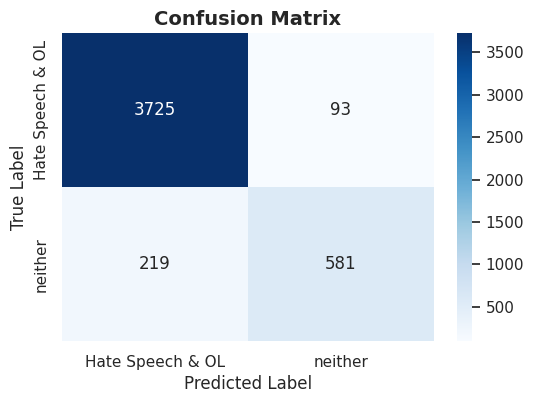

In [56]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['Hate Speech & OL', 'neither']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [57]:
# Classification Report
class_report = classification_report(test_labels, xgb_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96      3818
           2       0.86      0.73      0.79       800

    accuracy                           0.93      4618
   macro avg       0.90      0.85      0.87      4618
weighted avg       0.93      0.93      0.93      4618



### ***Word2VEc model (Embedding Technique)***

In [58]:
df = dataset

# Splitting data into features (text) and labels
X = df['Cleaned_text']

# Convert boolean labels to numeric format using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['updated_class'])

# Convert the target variable to one-hot encoded format
y_onehot = to_categorical(y, num_classes=2)

# Train Word2Vec model on the text data
word2vec_model = Word2Vec(sentences=X.apply(lambda x: x.split()), vector_size=2, window=5, min_count=1, sg=0)

# Create an embedding matrix
embedding_matrix = word2vec_model.wv.vectors
embedding_dim = embedding_matrix.shape[1]

# Tokenize text and convert to sequences
# max_features = 1000
# tokenizer = Tokenizer(num_words=max_features)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to make them of equal length (optional, but necessary for neural networks)
max_sequence_length = max(len(seq) for seq in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=42)

# Building the neural network
model = Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
y_pred_onehot = model.predict(X_test)
y_pred = y_pred_onehot.argmax(axis=1)

# Accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test.argmax(axis=1), y_pred)
print("Classification Report:")
print(class_report)


Epoch 1/5
578/578 [==============================] - 24s 32ms/step - loss: 0.2954 - accuracy: 0.8767 - val_loss: 0.1536 - val_accuracy: 0.9372
Epoch 2/5
578/578 [==============================] - 4s 6ms/step - loss: 0.1176 - accuracy: 0.9537 - val_loss: 0.1491 - val_accuracy: 0.9392
Epoch 3/5
578/578 [==============================] - 4s 7ms/step - loss: 0.0726 - accuracy: 0.9752 - val_loss: 0.1696 - val_accuracy: 0.9322
Epoch 4/5
578/578 [==============================] - 3s 6ms/step - loss: 0.0469 - accuracy: 0.9847 - val_loss: 0.1967 - val_accuracy: 0.9283
Epoch 5/5
145/145 [==============================] - 0s 2ms/step
Accuracy: 91.55%
Confusion Matrix:
[[3587  255]
 [ 135  641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3842
           1       0.72      0.83      0.77       776

    accuracy                           0.92      4618
   macro avg       0.84      0.88      0.86      4618
weighted avg

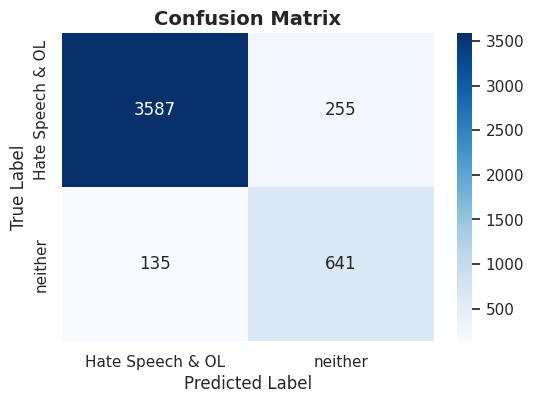

In [59]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['Hate Speech & OL', 'neither']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()